# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [62]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [38]:
#The file is not available at target location due to permissions. We ahave local copy of the same file.

# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [39]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [40]:
#data type of each column
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [41]:
pima_df.shape

(768, 9)

In [42]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [43]:
#First I am replacing 0 with  
pima_df.replace(0,pima_df.median(),inplace=True)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [44]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [45]:
#Class distribution
pima_df.groupby(["class"]).count()

# We see 500 observation in class 0(non diabetic) and 268 in class 1( diabetic). The dataset is sligthly inbalanced 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


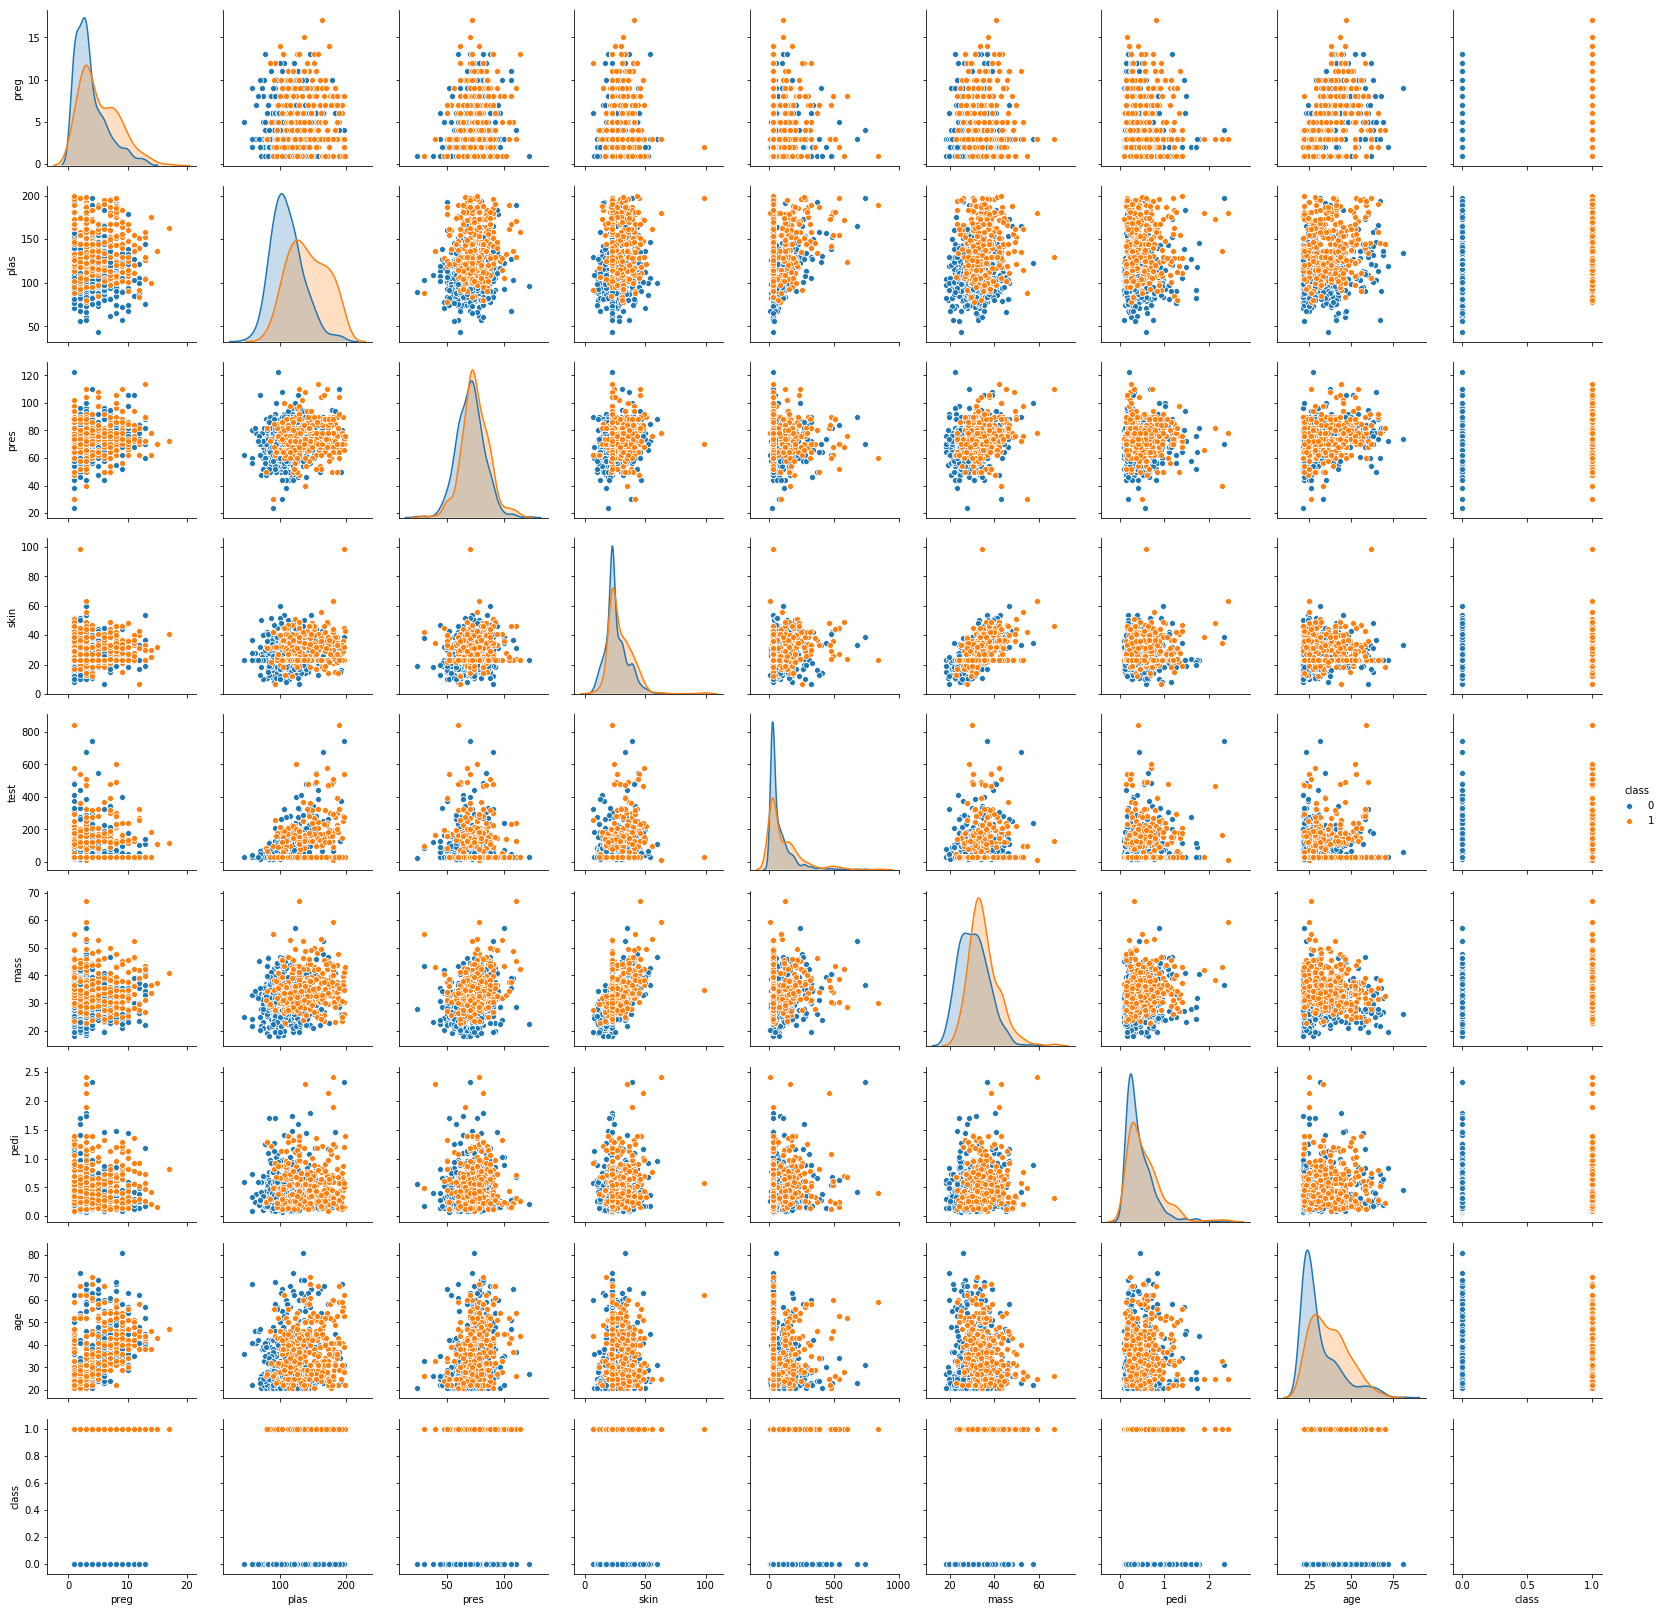

In [53]:
# Distribution of class with respect to other features in dataset. Pairplot.
sns.pairplot(pima_df,hue="class")

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [55]:
#Analysis

pima_df.describe()

# We are using plas(plasma glucose concentration) and age to do analysis
# From dataset describe we seee the max age is 81 and mean age is 33 that means the population is concentrated around age 33
# Plasma attributes data is normally distributed. 

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


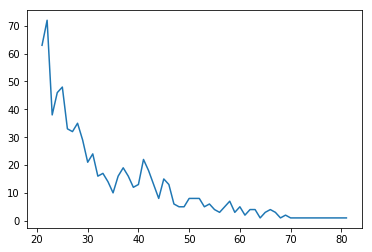

In [57]:
pima_df["age"].value_counts().sort_index().plot.line()
# The graph shows there are more observations conentrated under age 50

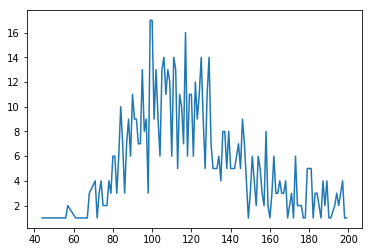

In [58]:
pima_df["plas"].value_counts().sort_index().plot.line()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

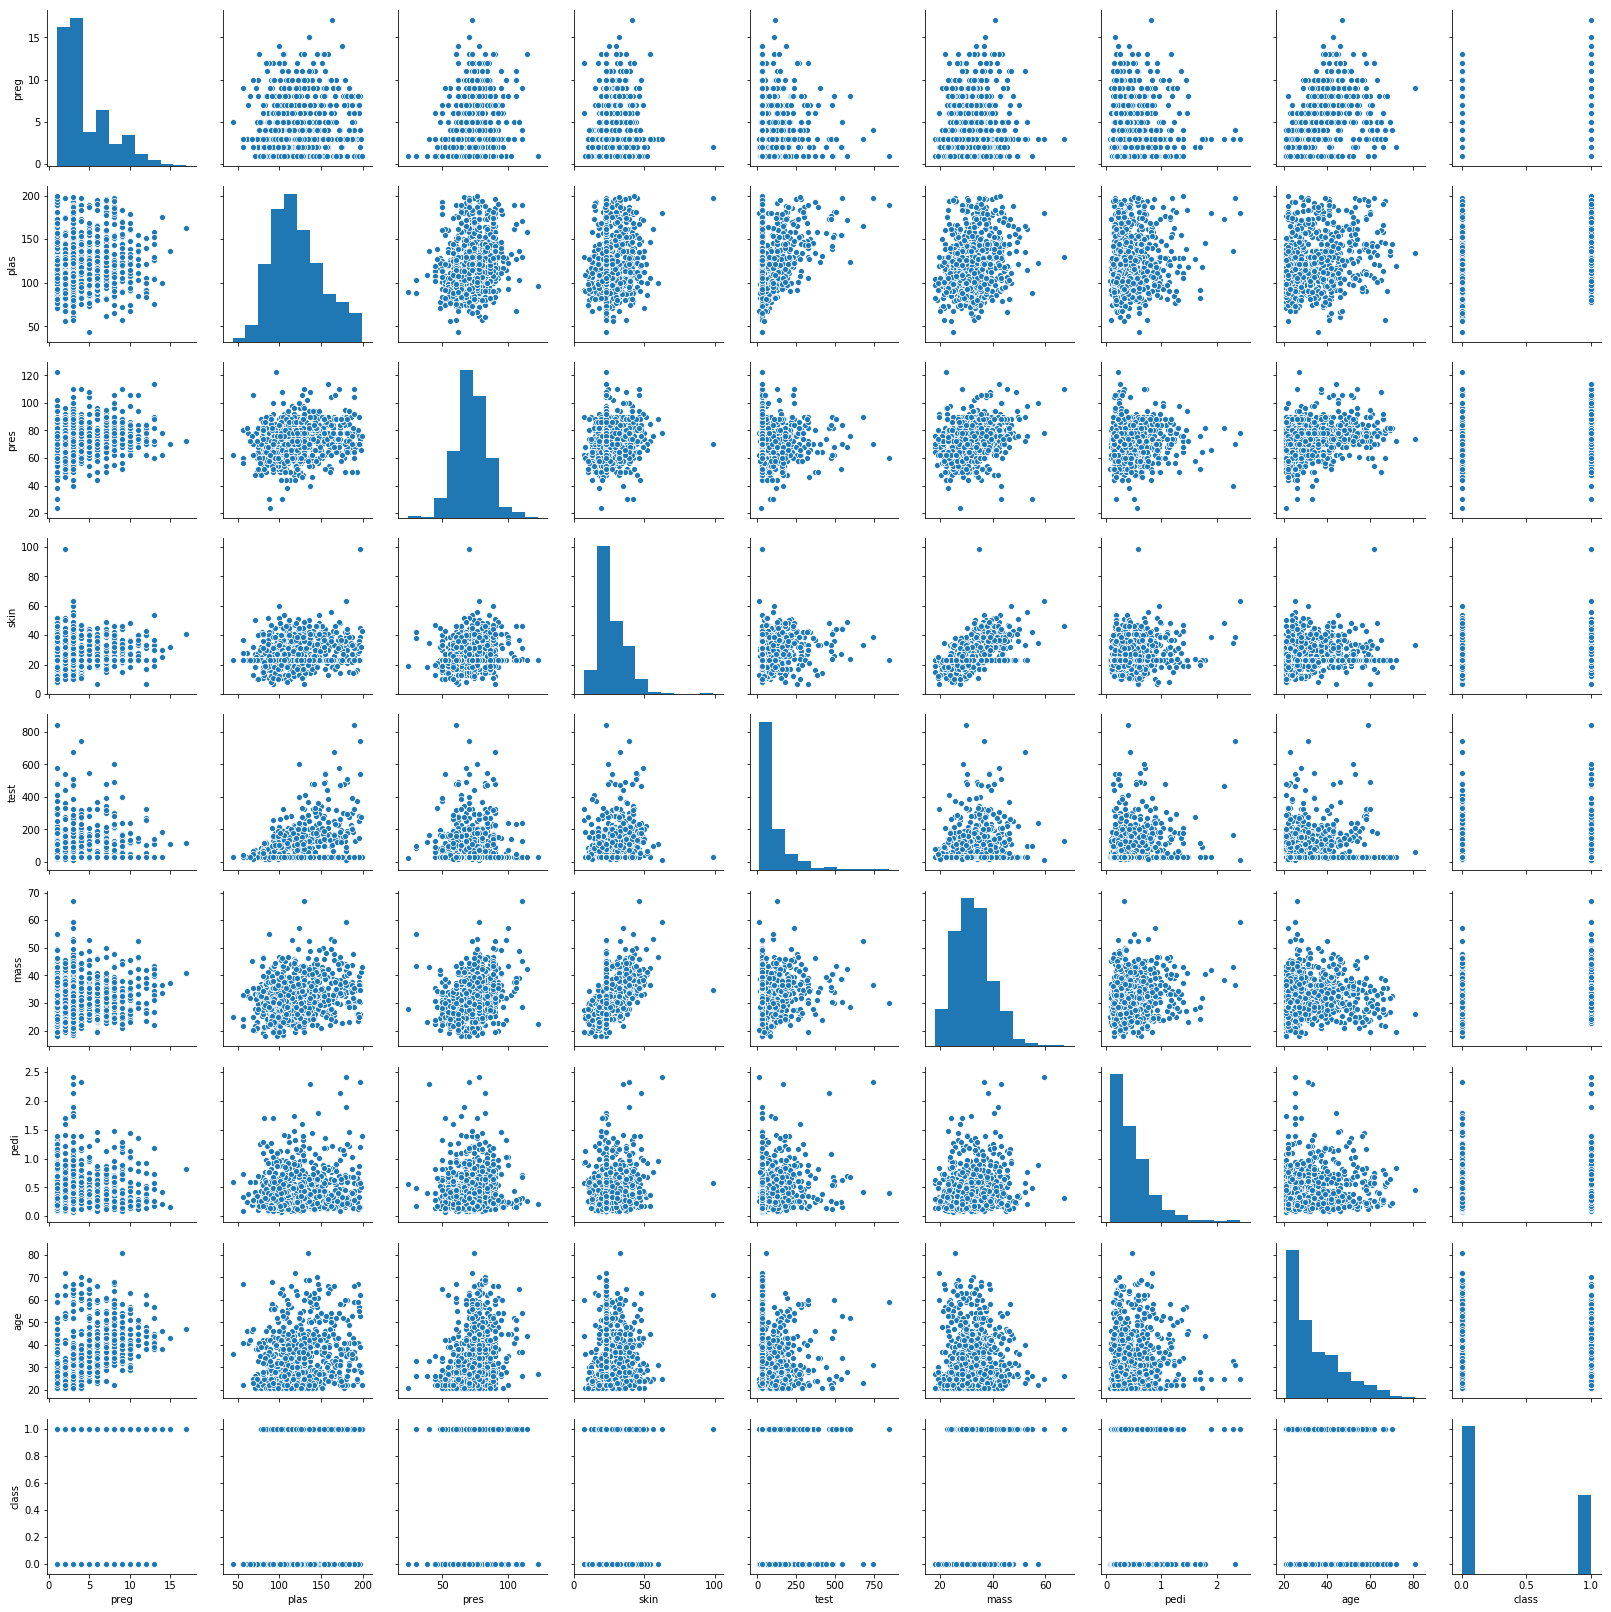

In [59]:
#Plotting the variables
sns.pairplot(pima_df)

# Analysis

# plas, pres, skin, and mass Attributes are normally distributed.
# Age,pedi and Preg attributes data is skewed in the distribution.

# Age,test and preg attribute values are concentrated towards the median value and we see long tail towards right.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.



# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [60]:
#Create X and Y accordingly
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

#create train/test datasets

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [64]:
DTmodel = DecisionTreeClassifier(criterion = 'entropy' )
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [65]:
DTmodel.score(X_test , y_test)

0.7402597402597403

In [66]:
y_predict = DTmodel.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[118  29]
 [ 31  53]]


Print the feature importance of the decision model - Optional

In [67]:
print (pd.DataFrame(DTmodel.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
preg  0.074168
plas  0.278225
pres  0.067840
skin  0.101392
test  0.025914
mass  0.183384
pedi  0.099097
age   0.169981


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [69]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 150)
rfcl = rfcl.fit(X_train, y_train)

In [71]:
#Prediction and accuracy
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))

0.7705627705627706


In [72]:
#Random forest Confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

[[123  24]
 [ 29  55]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [74]:
#Adaboost 

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=DTmodel, n_estimators=150)
abcl = abcl.fit(X_train, y_train)


In [75]:
#Adaboost predict and accuracy
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.7186147186147186


In [76]:
#Confusion metrix
print(metrics.confusion_matrix(y_test, y_predict))

[[116  31]
 [ 34  50]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [77]:
#Bagging classifier

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DTmodel, n_estimators=150)
bgcl = bgcl.fit(X_train, y_train)

In [78]:
#Bagging predict and accuracy
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.7532467532467533


In [79]:
#Confusion metrix
print(metrics.confusion_matrix(y_test, y_predict))

[[115  32]
 [ 25  59]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100)
gbcl = gbcl.fit(X_train, y_train)

In [82]:
#Gradient boost predict and accuracy
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))

0.7705627705627706


In [83]:
#Confusion metrix
print(metrics.confusion_matrix(y_test, y_predict))

[[120  27]
 [ 26  58]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.